# 390 Imanes - Día 4

## Leer Datos

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns  
from scipy.stats import gaussian_kde

In [9]:
dir = 'data-general.csv'
data = pd.read_csv(dir, sep=';', decimal=',')
data['Numero de Caja'] = None    
data['B Absoluto (mT)'] = None
data['Medicion Numero'] = None 
data.head()

,Station N.,Date,Time,Magnet ID,B (mT),Zero (mT),Numero de Caja,B Absoluto (mT),Medicion Numero
0,1,Wed Jan 8 2025,12:07:13,31,9.82,5.92,None,None,None
1,1,Wed Jan 8 2025,12:07:49,32,9.70,5.92,None,None,None
2,1,Wed Jan 8 2025,12:14:10,33,9.84,5.82,None,None,None
3,1,Wed Jan 8 2025,12:15:07,34,9.88,5.82,None,None,None
4,1,Wed Jan 8 2025,12:15:37,35,9.82,5.82,None,None,None


## Separar por Día

In [10]:
# Lista de días
dias = ['Wed Jan 8 2025', 'Thu Jan 9 2025', 'Wed Jan 15 2025']

# Crear el diccionario con arreglos vacíos para cada día
data_por_dia = {}

for i, dia in enumerate(dias):
    clave = f"Campo Magnetico - Dia {i + 1}"
    data_por_dia[clave] = np.array([])

# Clasificar los datos en el diccionario según el día
for i, fecha in enumerate(data['Date']):
    for j, dia in enumerate(dias):
        if fecha == dia:  # Comparar fechas
            clave = f"Campo Magnetico - Dia {j + 1}"
            data_por_dia[clave] = np.append(data_por_dia[clave], data['B (mT)'][i])

# Mostrar el resultado final
#for clave, valores in data_por_dia.items():
#    print(f"{clave}: {valores}")

#print(len(data_por_dia['Campo Magnetico - Dia 1']))
#print(len(data_por_dia['Campo Magnetico - Dia 2']))
#print(len(data_por_dia['Campo Magnetico - Dia 3']))

#pd.set_option('display.max_rows', None)  # Muestra todas las filas
#pd.set_option('display.max_columns', None)  # Muestra todas las columnas

## Visualización General

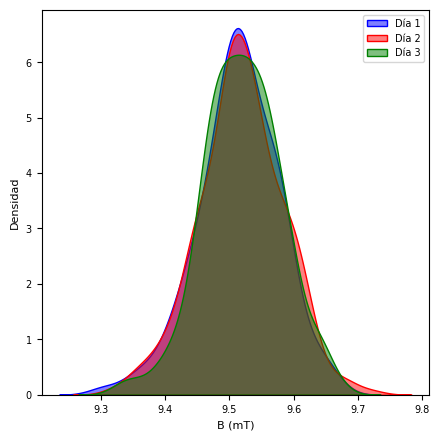

In [11]:
desplazamiento_dia1 = 0.315

fig, ax = plt.subplots(1, 1, figsize=(5, 5))  

sns.kdeplot(data_por_dia['Campo Magnetico - Dia 1'] - desplazamiento_dia1, fill=True, color='blue', label='Día 1', alpha=0.5, ax=ax)
sns.kdeplot(data_por_dia['Campo Magnetico - Dia 2'], fill=True, color='red', label='Día 2', alpha=0.5, ax=ax)
sns.kdeplot(data_por_dia['Campo Magnetico - Dia 3'], fill=True, color='green', label='Día 3', alpha=0.5, ax=ax)

ax.set_xlabel('B (mT)', fontsize=8)
ax.set_ylabel('Densidad', fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=7)
ax.legend(loc='upper right', fontsize=7)

#plt.savefig('density.png', dpi=500)  

In [12]:
# Combinar todos los datos ajustando el día 1 con un offset de -0.315
todos_los_datos = np.concatenate([
    data_por_dia['Campo Magnetico - Dia 1'] - 0.315,
    data_por_dia['Campo Magnetico - Dia 2'],
    data_por_dia['Campo Magnetico - Dia 3']
])

# Mostrar el resultado
print(len(todos_los_datos))

810


In [13]:
# Combinar todos los datos ajustando el día 1 con un offset de -0.315
todos_los_datos = np.concatenate([
    data_por_dia['Campo Magnetico - Dia 1'] - 0.315,
    data_por_dia['Campo Magnetico - Dia 2'],
    data_por_dia['Campo Magnetico - Dia 3']
])

# Mostrar el resultado
print(len(todos_los_datos))

810


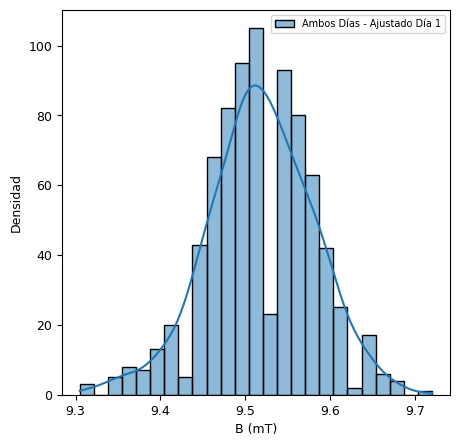

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))  
bins = 22

#ax.hist(campos_magneticos, bins = bins, label = "Ambos Días Ajustado Día 1", color='green', alpha=0.9, density = False)
df_B = pd.DataFrame(todos_los_datos)
sns.histplot(df_B, kde=True, label = "Ambos Días - Ajustado Día 1")
ax.set_xlabel('B (mT)', fontsize=9)
ax.set_ylabel('Densidad', fontsize=9)
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)
ax.legend(loc='upper right', fontsize=7)

plt.savefig('hist.png', dpi=500)  # Guardar con alta resolución

## Descarte

In [14]:
# Porcentaje a descartar en cada lado
percent_to_discard = 5

# Calcular los límites inferior y superior
lower_limit = np.percentile(todos_los_datos, percent_to_discard)
upper_limit = np.percentile(todos_los_datos, 100 - percent_to_discard)

# Filtrar los datos dentro de los límites
filtered_data = todos_los_datos[(todos_los_datos >= lower_limit) & (todos_los_datos <= upper_limit)]

# Mostrar el número de datos restantes
filtered_data

array([9.505, 9.525, 9.565, 9.505, 9.485, 9.585, 9.525, 9.565, 9.585,
       9.565, 9.485, 9.525, 9.585, 9.565, 9.485, 9.465, 9.505, 9.525,
       9.525, 9.505, 9.525, 9.585, 9.585, 9.585, 9.545, 9.465, 9.605,
       9.465, 9.445, 9.525, 9.565, 9.505, 9.605, 9.525, 9.505, 9.505,
       9.525, 9.525, 9.425, 9.525, 9.465, 9.485, 9.565, 9.585, 9.485,
       9.565, 9.485, 9.525, 9.505, 9.545, 9.545, 9.545, 9.565, 9.445,
       9.445, 9.585, 9.585, 9.525, 9.605, 9.445, 9.565, 9.485, 9.525,
       9.425, 9.465, 9.585, 9.425, 9.425, 9.505, 9.565, 9.485, 9.525,
       9.485, 9.485, 9.465, 9.565, 9.545, 9.505, 9.445, 9.525, 9.505,
       9.445, 9.585, 9.545, 9.565, 9.485, 9.485, 9.505, 9.525, 9.505,
       9.525, 9.565, 9.525, 9.505, 9.425, 9.505, 9.505, 9.605, 9.505,
       9.545, 9.465, 9.525, 9.545, 9.525, 9.505, 9.485, 9.505, 9.465,
       9.525, 9.505, 9.585, 9.585, 9.545, 9.445, 9.485, 9.445, 9.545,
       9.565, 9.525, 9.565, 9.505, 9.445, 9.485, 9.485, 9.465, 9.58 ,
       9.5  , 9.56 ,

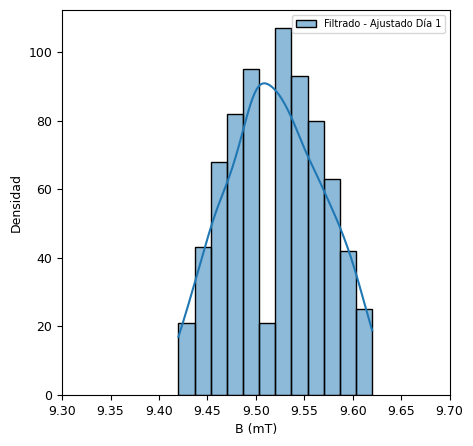

In [67]:
# Graficar el histograma filtrado
fig, ax = plt.subplots(1, 1, figsize=(5, 5))  
bins = 22

# Crear un DataFrame para el filtrado
df_B_filtered = pd.DataFrame(filtered_data)
sns.histplot(df_B_filtered, kde=True, label="Filtrado - Ajustado Día 1", color='blue')
#sns.kdeplot(todos_los_datos, fill=False, color='blue', label='filtrado', alpha=0.5, ax=ax, )
#sns.kdeplot(todos_los_datos, fill=False, color='red', label='todos los datos', alpha=0.5, ax=ax, )
ax.set_xlabel('B (mT)', fontsize=9)
ax.set_ylabel('Densidad', fontsize=9)
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)
ax.legend(loc='upper right', fontsize=7)
ax.set_xlim([9.3, 9.7])

plt.savefig('hist_filtered.png', dpi=500)  # Guardar con alta resolución